In [1]:
import gym
import gym.wrappers
import logging
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

In [23]:
# you'll need gym=0.7.1 for this
env = gym.make("Taxi-v1")
env = gym.wrappers.Monitor(env, "taxi-v1-res", force=True)
gym.logger.setLevel(logging.ERROR)

n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i"%(n_states,n_actions))

n_states=500, n_actions=6


In [24]:
def generate_session(t_max=10**4):
    """
    Play game until end or for t_max ticks.
    returns: list of states, list of actions and sum of rewards
    """
    states,actions = [],[]
    total_reward = 0.
    
    s = env.reset()
    
    for t in range(t_max):        
        a = np.random.choice(n_actions, p=policy[s])
        
        new_s,r,done,info = env.step(a)
        
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        if done:
            break
    return states,actions,total_reward
        

In [25]:
policy = np.ones(shape=(n_states, n_actions)) / n_actions

In [26]:
n_samples = 500  #sample this many samples
percentile = 40  #take this percent of session with highest rewards
smoothing = 0.1  #add this thing to all counts for stability
mean_rewards = []
thresholds = []
lr = 0.4
fine_tune_mode = False

In [27]:
for i in range(500):
    sessions = [generate_session() for _ in range(n_samples)]

    batch_states,batch_actions,batch_rewards = map(np.array,zip(*sessions))
    
    threshold = np.percentile(batch_rewards, percentile)
    
    elite_states = batch_states[batch_rewards >= threshold]
    elite_actions = batch_actions[batch_rewards >= threshold]
    
    elite_states, elite_actions = map(np.concatenate,[elite_states,elite_actions])
    elite_counts = np.zeros_like(policy)+smoothing
    
    for s, a in zip(elite_states, elite_actions):
        elite_counts[s][a] += 1

    elite_probs = elite_counts / elite_counts.sum(axis=1, keepdims=True)
    policy = (1-lr)*policy + lr * elite_probs
    
    mean_reward = np.mean(batch_rewards)
    print("%d: mean reward = %.5f\tthreshold = %.1f"%(i, mean_reward, threshold))
    mean_rewards.append(mean_reward)
    thresholds.append(threshold)
    
    if mean_reward > -10 and not fine_tune_mode:
        print("Switching into fine-tune mode")
        fine_tune_mode = True
        lr = 0.1
        percentile = 5
        smoothing = 0.0001

0: mean reward = -730.53600	threshold = -794.0
1: mean reward = -704.53000	threshold = -776.0
2: mean reward = -695.64800	threshold = -758.0
3: mean reward = -657.62600	threshold = -731.0
4: mean reward = -625.77400	threshold = -716.6
5: mean reward = -586.81400	threshold = -695.0
6: mean reward = -555.61400	threshold = -668.0
7: mean reward = -514.41400	threshold = -641.0
8: mean reward = -472.33800	threshold = -596.0
9: mean reward = -424.35200	threshold = -551.4
10: mean reward = -372.87400	threshold = -446.4
11: mean reward = -321.67200	threshold = -346.6
12: mean reward = -257.35400	threshold = -270.8
13: mean reward = -217.48600	threshold = -223.4
14: mean reward = -185.89600	threshold = -199.0
15: mean reward = -151.40800	threshold = -161.4
16: mean reward = -117.81600	threshold = -123.0
17: mean reward = -97.44800	threshold = -105.0
18: mean reward = -78.39200	threshold = -84.0
19: mean reward = -67.47600	threshold = -74.0
20: mean reward = -58.85200	threshold = -62.4
21: mean 

184: mean reward = 6.97600	threshold = -1.0
185: mean reward = 7.40200	threshold = 0.0
186: mean reward = 7.13200	threshold = -2.0
187: mean reward = 7.61800	threshold = 0.0
188: mean reward = 7.20800	threshold = -1.0
189: mean reward = 7.04600	threshold = -2.0
190: mean reward = 7.94000	threshold = 0.0
191: mean reward = 7.43800	threshold = 0.0
192: mean reward = 7.69200	threshold = 0.0
193: mean reward = 7.83400	threshold = 0.0
194: mean reward = 7.61000	threshold = 0.0
195: mean reward = 7.97800	threshold = 0.0
196: mean reward = 7.30800	threshold = -2.0
197: mean reward = 7.37000	threshold = -1.0
198: mean reward = 7.53600	threshold = 0.0
199: mean reward = 7.95000	threshold = 0.0
200: mean reward = 7.73000	threshold = -1.0
201: mean reward = 7.09400	threshold = -1.0
202: mean reward = 7.54200	threshold = 0.0
203: mean reward = 7.95600	threshold = 0.0
204: mean reward = 7.41000	threshold = -1.0
205: mean reward = 7.68200	threshold = 0.0
206: mean reward = 7.37600	threshold = 0.0
20

375: mean reward = 8.48200	threshold = 3.0
376: mean reward = 8.89200	threshold = 3.0
377: mean reward = 8.62400	threshold = 1.0
378: mean reward = 8.96800	threshold = 2.0
379: mean reward = 8.57800	threshold = 1.0
380: mean reward = 8.84800	threshold = 3.0
381: mean reward = 8.85800	threshold = 3.0
382: mean reward = 8.65600	threshold = 0.0
383: mean reward = 8.71400	threshold = 1.0
384: mean reward = 8.67400	threshold = 2.0
385: mean reward = 8.86000	threshold = 4.0
386: mean reward = 8.81400	threshold = 3.0
387: mean reward = 8.83400	threshold = 2.0
388: mean reward = 9.15600	threshold = 3.0
389: mean reward = 8.78600	threshold = 3.0
390: mean reward = 8.83600	threshold = 1.0
391: mean reward = 8.68600	threshold = 3.0
392: mean reward = 8.84600	threshold = 3.0
393: mean reward = 8.81200	threshold = 3.0
394: mean reward = 8.53800	threshold = 3.0
395: mean reward = 8.87000	threshold = 2.0
396: mean reward = 8.95600	threshold = 3.0
397: mean reward = 9.35000	threshold = 3.0
398: mean r

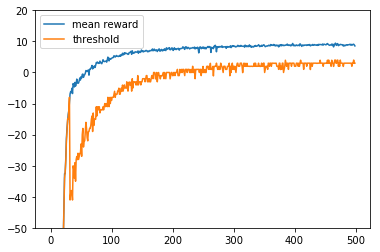

In [28]:
pl.plot(mean_rewards, label='mean reward')
pl.plot(thresholds, label='threshold')
pl.legend()
pl.ylim(-50, 20)
pl.show()

In [29]:
env.close()